In [1]:
import pandas as pd
from venn import venn
import os

In [2]:
with open('/project/gpaa/machine_learning/jainam_capstone/enrichment_analysis/LASSO_AA_genes.txt', 'r') as f:
  LASSO_genes = [x.rstrip() for x in f]
with open('/project/gpaa/machine_learning/jainam_capstone/enrichment_analysis/random_forest_AA_genes.txt', 'r') as f:
  random_forest_genes = [x.rstrip() for x in f]
with open('/project/gpaa/machine_learning/jainam_capstone/enrichment_analysis/rfe_AA_genes.txt', 'r') as f:
  rfe_genes = [x.rstrip() for x in f]

In [3]:
with open('/project/gpaa/machine_learning/jainam_capstone/feature_selection/average_rank_AA.csv', 'r') as f:
    genes = pd.read_csv(f)
DE_genes = genes.loc[genes['padj'] < 0.001]
DE_genes = DE_genes.sort_values(by = 'log2FoldChange', key = abs, ascending = False)
DE_genes = DE_genes['gene_name'].tolist()[0:240]

In [4]:
with open('/project/gpaa/machine_learning/jainam_capstone/enrichment_analysis/DE_AA_genes.txt', 'a') as f:
    for item in DE_genes:
        f.write("%s\n" % item)

<AxesSubplot:>

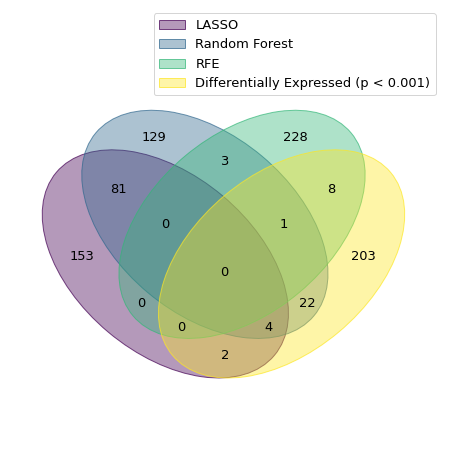

In [5]:
venn_dict = {"LASSO": set(LASSO_genes), "Random Forest": set(random_forest_genes), "RFE": set(rfe_genes), "Differentially Expressed (p < 0.001)": set(DE_genes)}
venn(venn_dict)